Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


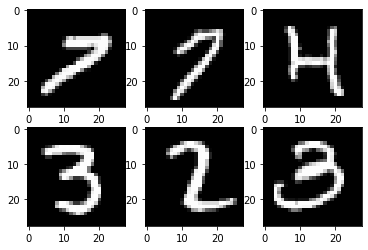

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import random
import tensorflow as tf

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# train i test podaci
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# prikaz karakteristika train i test podataka
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# TODO: prikazi nekoliko slika iz train skupa
for i in range(1,7):
  rand = random.choice(x_train)
  plt.subplot(2,3,i)
  plt.imshow(rand, cmap= 'gray')


In [ ]:
# skaliranje slike na raspon [0,1]
x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255

# slike trebaju biti (28, 28, 1)
x_train_s = np.expand_dims(x_train_s, -1)
x_test_s = np.expand_dims(x_test_s, -1)

print("x_train shape:", x_train_s.shape)
print(x_train_s.shape[0], "train samples")
print(x_test_s.shape[0], "test samples")


# pretvori labele
y_train_s = keras.utils.to_categorical(y_train, num_classes)
y_test_s = keras.utils.to_categorical(y_test, num_classes)


# TODO: kreiraj model pomocu keras.Sequential(); prikazi njegovu strukturu
model_mnist = tf.keras.Sequential([ # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_mnist(x_train_s)
model_mnist.summary()


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# TODO: definiraj karakteristike procesa ucenja pomocu .compile()
model_mnist.compile(loss='categorical_crossentropy',
  optimizer='sgd',
  metrics=['accuracy'])

# TODO: provedi ucenje mreze
model_mnist.fit(x_train_s, y_train_s, epochs=5, batch_size = 32)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6880 - accuracy: 0.8236
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3440 - accuracy: 0.9049
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.9172
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2676 - accuracy: 0.9247
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2466 - accuracy: 0.9310


In [ ]:
def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()


1875/1875 [==============================] - 3s 2ms/step


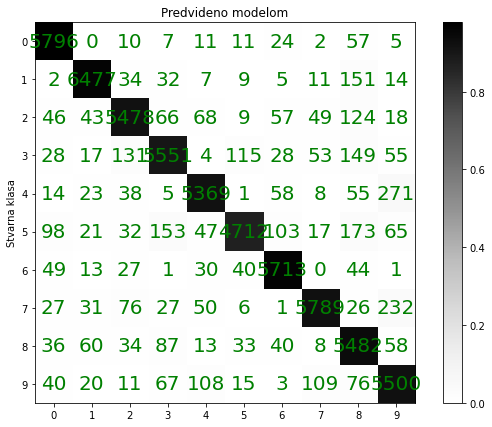

313/313 [==============================] - 1s 2ms/step


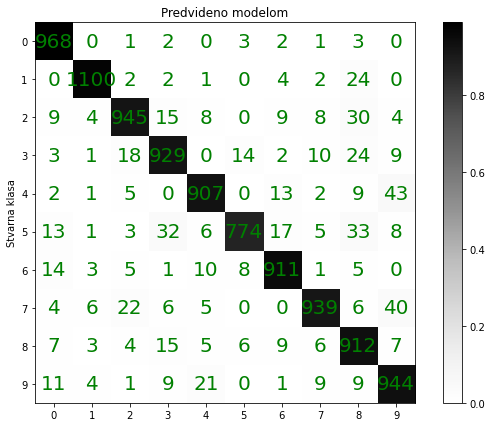

In [ ]:
# TODO: Prikazi test accuracy i matricu zabune
from sklearn.metrics import confusion_matrix

train_preds = model_mnist.predict(x_train)
train_preds = [np.argmax(pred) for pred in train_preds]
matrix = confusion_matrix(y_train, train_preds)
plot_confusion_matrix(matrix)

test_preds = model_mnist.predict(x_test)
test_preds = [np.argmax(pred) for pred in test_preds]
matrix = confusion_matrix(y_test, test_preds)
plot_confusion_matrix(matrix)



In [ ]:
# spremi model
model_mnist.save('model_mnist')

In [ ]:
model_minst_conv = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters = 5,
                         kernel_size = 3,
                         activation = "relu",
                         input_shape = (28,28,1)),
  tf.keras.layers.Conv2D(5,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding="valid"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10,activation="softmax")
])

model_minst_conv(x_train_s)
model_minst_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 5)         50        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 5)         230       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 5)        0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 720)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7210      
                                                                 
Total params: 7,490
Trainable params: 7,490
Non-trainable params: 0
____________________________________________________

In [ ]:
# TODO: definiraj karakteristike procesa ucenja pomocu .compile()
model_minst_conv.compile(loss='categorical_crossentropy',
  optimizer='sgd',
  metrics=['accuracy'])

# TODO: provedi ucenje mreze
model_minst_conv.fit(x_train_s, y_train_s, epochs=5, batch_size = 32)


Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5895 - accuracy: 0.8129
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2768 - accuracy: 0.9200
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1958 - accuracy: 0.9437
Epoch 4/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1483 - accuracy: 0.9573
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1205 - accuracy: 0.9658


1875/1875 [==============================] - 15s 8ms/step


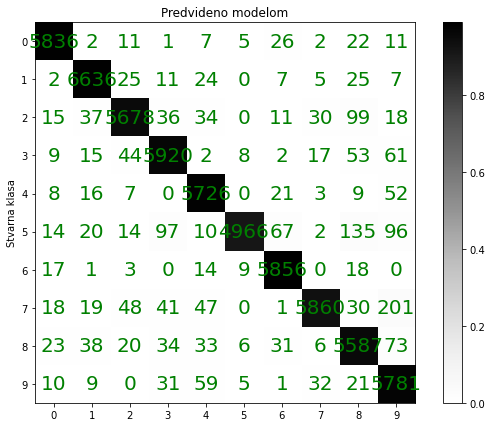

313/313 [==============================] - 3s 8ms/step


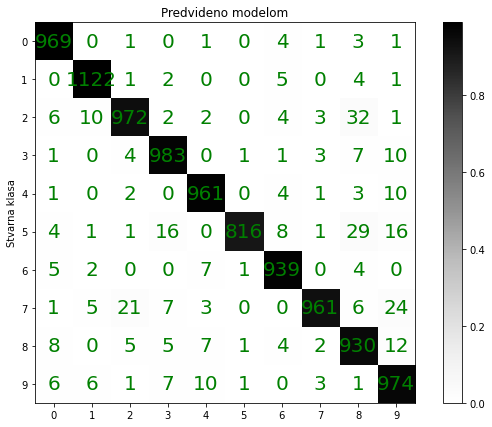

In [ ]:
# TODO: Prikazi test accuracy i matricu zabune
from sklearn.metrics import confusion_matrix

train_preds = model_minst_conv.predict(x_train)
train_preds = [np.argmax(pred) for pred in train_preds]
matrix = confusion_matrix(y_train, train_preds)
plot_confusion_matrix(matrix)

test_preds = model_minst_conv.predict(x_test)
test_preds = [np.argmax(pred) for pred in test_preds]
matrix = confusion_matrix(y_test, test_preds)
plot_confusion_matrix(matrix)

In [ ]:
model_mnist.save('model_mnist_conv')

<ipython-input-11-e0887e8fc8e4>:12: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = color.rgb2gray(img)


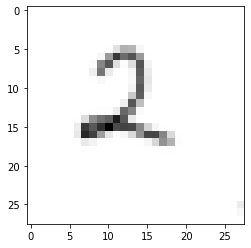

1/1 [==============================] - 0s 46ms/step
------------------------
3
3


In [ ]:
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
from matplotlib import pyplot as plt
from skimage.transform import resize
from skimage import color
import matplotlib.image as mpimg
import numpy as np

filename = '/content/2.PNG'

img = mpimg.imread(filename)
img = color.rgb2gray(img)
img = resize(img, (28, 28))


plt.figure()
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()


img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')


# TODO: ucitaj model
model = keras.models.load_model('/content/model_mnist')
model_conv = keras.models.load_model('/content/model_mnist_conv')
# TODO: napravi predikciju 
pred = model.predict(img)
pred_conv = model_conv.predict(img)
# TODO: ispis rezultat
print("------------------------")
print(np.argmax(pred))
print(np.argmax(pred_conv))

In [ ]:
import cv2
import numpy as np
import joblib
from sklearn.neural_network import MLPClassifier


# display
cv2.namedWindow("frame", cv2.WINDOW_NORMAL)   
cv2.namedWindow("edges", cv2.WINDOW_NORMAL)
font = cv2.FONT_HERSHEY_SIMPLEX

# TODO: ucitaj mrezu s diska
model_conv = keras.models.load_model('/content/model_mnist_conv')

# algorithm params
pad = 15
size_th = 32
mnist_size = 28

# video processing
cp = cv2.VideoCapture(0)
kernel1 = np.ones((7,7), np.uint8)
kernel2 = np.ones((5,5), np.uint8)

# some vars
label = "unkown"

while True:
    
    ret, frame = cp.read(0)

    # frame preprocessing - getting edges
    gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
    v = np.median(gray_img)
    lower = int(max(0, (1.0 - 0.33) * v))
    upper = int(min(255, (1.0 + 0.33) * v))
    edge_img = cv2.Canny(gray_img, lower, upper)
    img_preprocessed = cv2.dilate(edge_img, kernel1, iterations=1)
    img_preprocessed = cv2.erode(img_preprocessed, kernel2, iterations=1)

    # get countours and bounding boxes (rects)
    _, contours, _ = cv2.findContours(img_preprocessed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    rects = [cv2.boundingRect(contour) for contour in contours]
    rects = [rect for rect in rects if rect[2] >= 3 and rect[3] >= 8]


    # loop over all rectangles (detections) and classify them
    for rect in rects:
        
        x, y, w, h = rect

        #crop rectangle from image        
        cropped_digit = img_preprocessed[y-pad:y+h+pad, x-pad:x+w+pad]
        cropped_digit = cropped_digit/255.0

        #filter small rectangles:
        if cropped_digit.shape[0] >= size_th and cropped_digit.shape[1] >= size_th:
            cropped_digit = cv2.resize(cropped_digit, (mnist_size, mnist_size))
        else:
            continue
        
        # start TODO: klasificiraj sliku (cropped_digit) s konvolucijskom neuronskom mrezom i zapisi predikciju u varijablu label (as string)
        label = np.argmax(model_conv.predict(cropped_digit))

        # end of TODO

        # show rectangle and label on frame
        cv2.rectangle(frame, (x - pad, y - pad), (x + pad + w, y + pad + h), color = (255, 255, 0))

        cv2.putText(frame, label, (rect[0], rect[1]), font,
            fontScale = 0.5,
            color = (255, 0, 0),
            thickness =  1,
            lineType =  cv2.LINE_AA)


    # show results
    cv2.imshow("frame", frame)
    cv2.imshow("edges", img_preprocessed)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


